# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
# Инструкция по выполнению проекта
- Шаг 1. Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/games.csv. Скачать датасет  
- Шаг 2. Подготовьте данные
Замените названия столбцов (приведите к нижнему регистру);
Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
Обработайте пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
- Шаг 3. Проведите исследовательский анализ данных
Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
Соотнесите выводы с продажами игр на других платформах.
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
- Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?
- Шаг 5. Проверьте гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.
- Шаг 6. Напишите общий вывод
Оформление: Выполните задание в Jupyter Notebook. Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.
# Описание данных
Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы проданных копий)
EU_sales — продажи в Европе (миллионы проданных копий)
JP_sales — продажи в Японии (миллионы проданных копий)
Other_sales — продажи в других странах (миллионы проданных копий)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

**Цель :** Выявить определяющие успешность игры закономерности. Спрогнозировать потенциально популярный продукт. <br>
**Данные :** исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы из открытых источников

**Шаг 1. Открытие файла**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats as st

In [2]:
pth1_train = '/datasets/games.csv'
pth2_train = 'games.csv'

if os.path.exists(pth1_train):
    data = pd.read_csv(pth1_train)
elif os.path.exists(pth2_train):
    data = pd.read_csv(pth2_train)
else:
    print('Something is wrong')

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Шаг 2. Подготовка данных**

In [4]:
data.columns = [x.lower() for x in data.columns]

- приводим названия колонок к нижнему регистру

In [5]:
data['user_score'] = (data['user_score']
                      .replace('tbd', np.NaN)
                      .astype(float)
                     ) 
data['user_score'] = data['user_score'].fillna(data['user_score'].mean()) 
data['year_of_release'] = data['year_of_release'].fillna(data['year_of_release'].mean())
data['critic_score'] = data['critic_score'].fillna(data['critic_score'].mean())

- заменяем тип данных в колонке 'year_of_release' на int, так как год - целое число
- заменяем тип данных в колонке 'user_score' на float, так как рейтинг указан дробным числом
- пропуски могли появится из за человеческого фактора либо ошибок при хранении или переносе данных 
- 'tbd' в столбце 'user_score' меняем на значение NaN, после этого меняем NaN на медианное значение 

In [6]:
data['sum_sales'] =  data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

- добавляем колонку с общими прадажами 

In [7]:
data['rating'] = data['rating'].replace('K-A', 'E10+')
data = data.query('rating != "EC" and rating != "RP" and rating != "AO"')
data['rating'] = data['rating'].fillna('Unknown')

data['rating'].value_counts()

Unknown    6766
E          3990
T          2961
M          1563
E10+       1423
Name: rating, dtype: int64

- рейтинг К-А заменяем на Е10+ -это одно и тоже 
- удаляем строки с редкими рейтингами 

In [8]:
data.dropna(subset=['year_of_release', 'name', 'rating'])
data['year_of_release'] = data['year_of_release'].astype(int)

- удаляем строки с пропусками, которые могут повлиять на исследоваия 

**Шаг 3. Исследовательский анализ данных**

In [9]:
years_release = data.pivot_table(index='year_of_release', values='name', aggfunc = 'count')
years_release

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


- во внимание можно принять данные за последние несколько лет

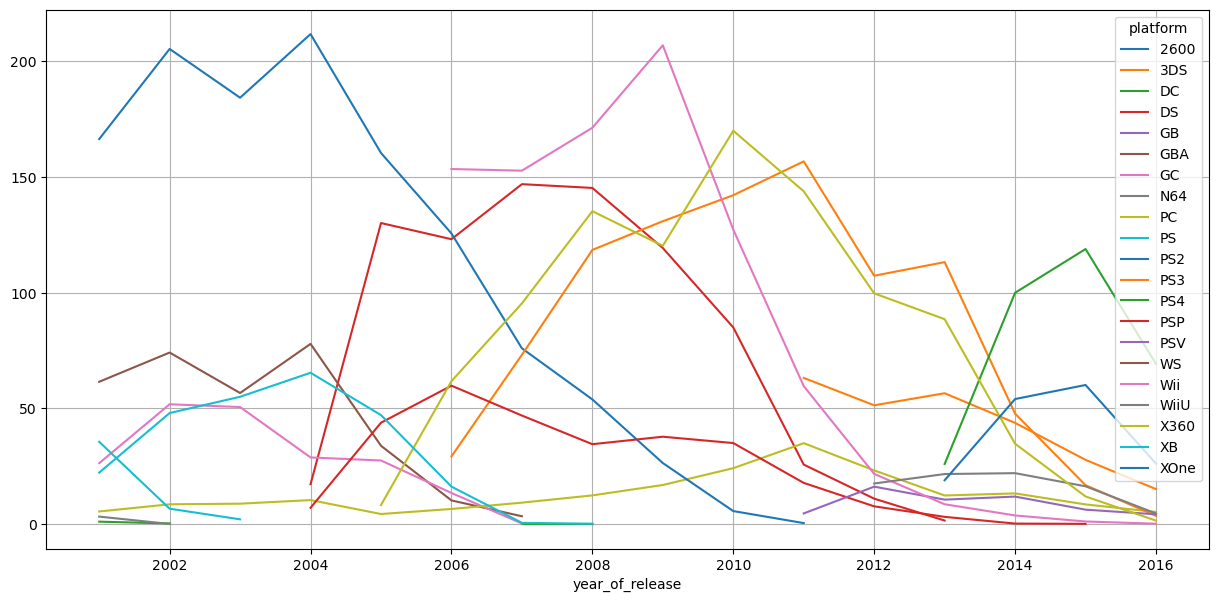

In [10]:

data.query("2001 <= year_of_release <= 2016").pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='sum_sales', 
    aggfunc='sum'
).plot(grid=True, figsize=(15, 7))
plt.show()
data = data.query("2014 <= year_of_release <= 2016")

- Разные платформа появляются часто, раз в год а иногда и две за год. Исчезают платформа постепенно, относительно своего появления 
- В среднем платформы "живут" около 8 лет, актуальность платформы сохраняют 4-6 лет
- Для анализа берем последние 3 года 

In [11]:
platform_sales = data.pivot_table(
    index='platform', 
    values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales'],
    aggfunc='sum'
)
platform_sales

,eu_sales,jp_sales,na_sales,other_sales,sum_sales
platform,,,,,
3DS,16.12,44.24,22.64,3.68,86.68
PC,17.97,0.00,7.23,1.85,27.05
PS3,25.54,11.22,22.05,9.37,68.18
PS4,130.04,15.02,98.61,44.48,288.15
PSP,0.00,0.36,0.00,0.00,0.36
PSV,3.53,14.54,2.52,1.81,22.40
Wii,2.59,0.00,2.08,0.40,5.07
WiiU,13.15,7.31,19.36,3.16,42.98
X360,15.49,0.08,28.30,4.35,48.22


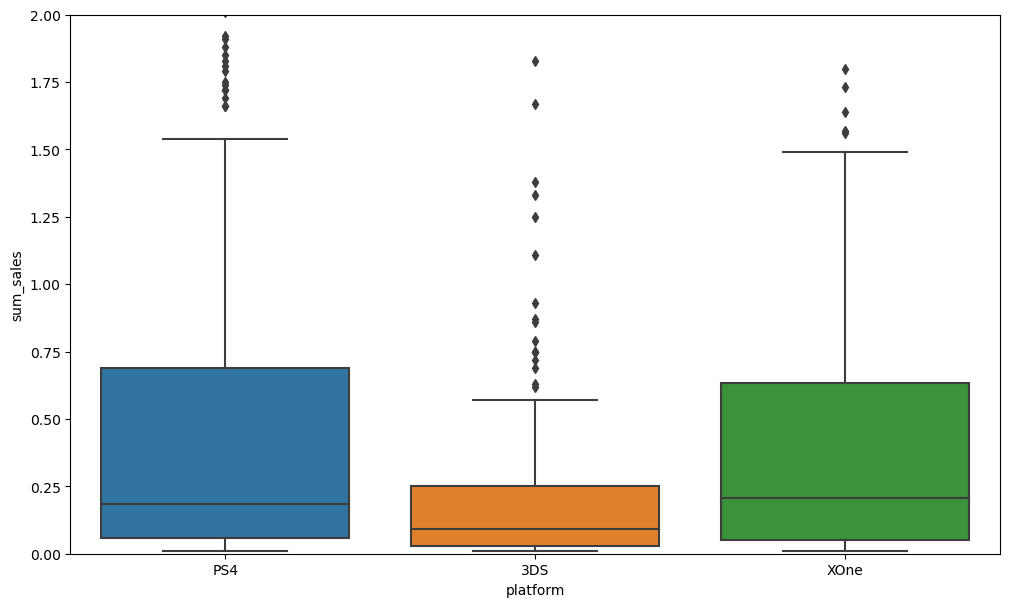

In [12]:
data_all = data
data = data.query("platform == ['PS4', 'XOne', '3DS']")
plt.figure(figsize=(12,7))
sns.boxplot(data=data['sum_sales'], x=data['platform'], y=data['sum_sales'])
plt.ylim(top=2)
plt.ylim(bottom=0);

- PS4, 3DS, XBox One - самыепопулярные платформы 
- Либо есть вбрсы , либо некоторые игры били все рекорды продаж 

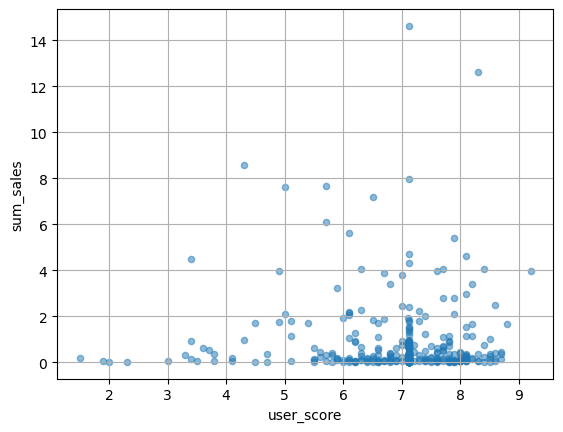

-0.04730235443007459

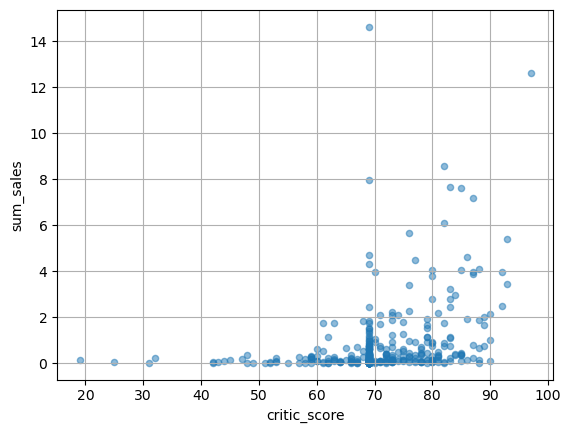

0.34293252414207787

In [13]:
def corr_plot(df, platform):
    data_new = df.query("platform == @platform")
    score_table = data_new[['platform', 'user_score','critic_score', 'sum_sales']]
    score_table.plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.5, grid=True)
    plt.show()
    display(score_table['user_score'].corr(score_table['sum_sales']))
    score_table.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.5, grid=True)
    plt.show()
    display(score_table['critic_score'].corr(score_table['sum_sales']))
    
corr_plot(data, 'PS4')

- между оценкой пользователей и продажами скорее всего связи нет <br>
- между оценкой критиков и продажами есть слабовыраженная связь

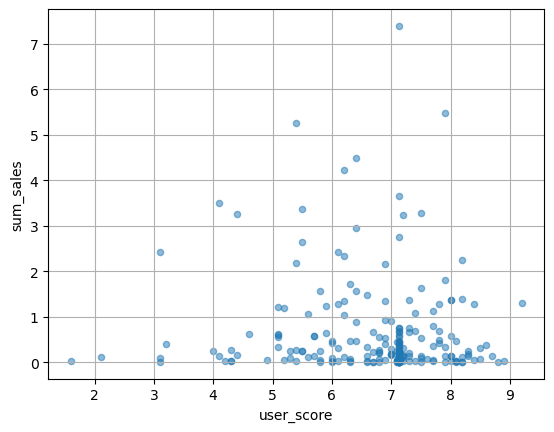

-0.08417575238459632

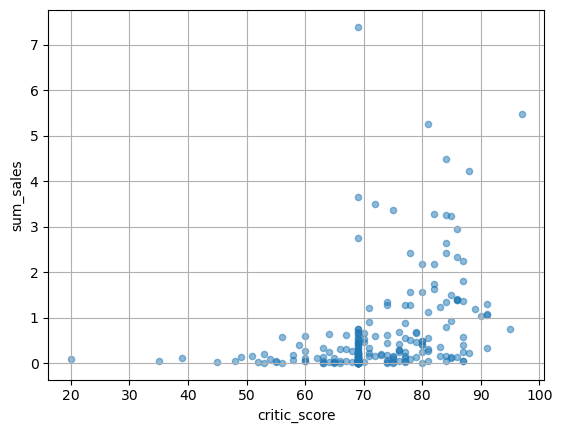

0.3842009443335383

In [14]:
corr_plot(data, 'XOne')

- между оценкой пользователей и продажами скорее всего связи нет <br>
- между оценкой критиков и продажами есть слабовыраженная связь

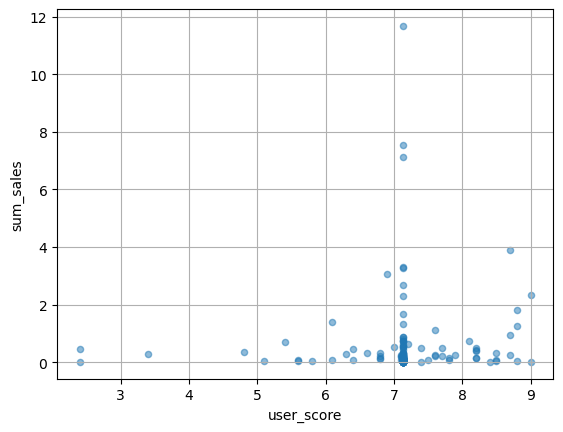

0.06855986888488963

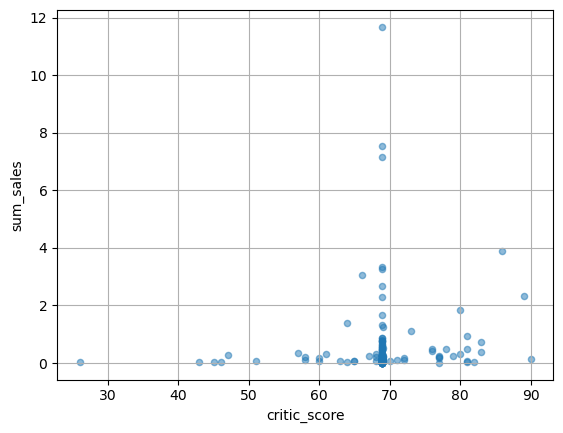

0.09981069470971907

In [15]:
corr_plot(data, '3DS')

- между оценкой пользователей и продажами скорее всего связи нет <br>
- между оценкой критиков и продажами скорее всего связи нет

<Axes: xlabel='genre'>

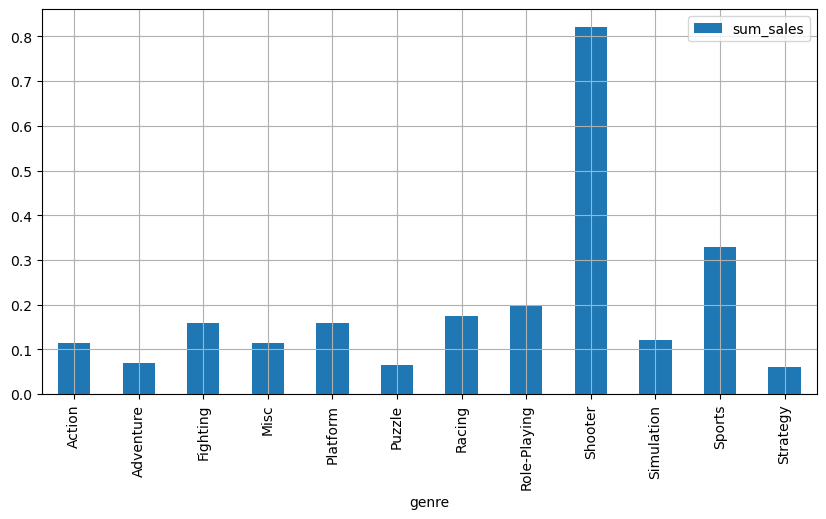

In [16]:
(data
 .pivot_table(index='genre', 
              values='sum_sales', 
              aggfunc='median'
             )
 .plot(kind='bar', 
       grid=True, 
       figsize=(10, 5)
      )
)

- Лидер продаж - шутеры <br>
- хуже всего дела с продажами обстоят у стратегий и пазлов

**Шаг 4. Портрет пользователя каждого региона**

In [17]:
def top_5_region(region, tayp):
    display(data_all
     .query("2014 <= year_of_release <= 2016")
     .pivot_table(index=tayp, 
                  values=region, 
                  aggfunc='mean'
                 )
     .sort_values(by=region, 
                  ascending=False
                 )
     .head()
    
    )
top_5_region('eu_sales', 'platform')

,eu_sales
platform,
PS4,0.345851
Wii,0.235455
XOne,0.202851
WiiU,0.180137
X360,0.139550


- PS4 является лидером продаж в Европе 
- на втором месте Wii, но приставка скорее всего переживает свой закат, так как она предыдущего поколения

In [18]:
top_5_region('eu_sales', 'genre')

,eu_sales
genre,
Shooter,0.511875
Sports,0.284037
Racing,0.204783
Platform,0.178947
Simulation,0.165909


- Шутеры неплохо продаются в Европе

In [19]:
top_5_region('na_sales', 'platform')

,na_sales
platform,
XOne,0.356447
WiiU,0.265205
PS4,0.262261
X360,0.254955
Wii,0.189091


- первое месте Xbox One
- на втором месте WiiU - которая закончила производиться в 2017г 

In [20]:
top_5_region('na_sales', 'genre')

,na_sales
genre,
Shooter,0.617344
Sports,0.286522
Fighting,0.207167
Platform,0.178684
Role-Playing,0.151448


- Как было видно на графике шутеры и спортивные игры больше продаются

In [21]:
top_5_region('jp_sales', 'platform')

,jp_sales
platform,
3DS,0.208679
WiiU,0.100137
PS3,0.051233
PSV,0.049288
PS4,0.039947


- В японии явное лидерство за протативной 3DS, почти половина рынка

In [22]:
top_5_region('jp_sales', 'genre')

,jp_sales
genre,
Role-Playing,0.140995
Fighting,0.106167
Platform,0.070789
Puzzle,0.066429
Simulation,0.052500


- вкусы тут тоже отличаются, RPG сдесь продается лучше всего

In [23]:
def rating_plot(region):
    item = (data_all
            .pivot_table(index='rating', 
                         values=region, 
                         aggfunc='sum'
                        )
            .reset_index()
           )
    fig = px.bar(item, 
                 x = 'rating', 
                 y = region, 
                 color = 'rating'
                )      
    fig.show()
    
rating_plot('eu_sales')

- В европе чаще покупают игры с рейтингом 17+ 
- На втором месте игры без рейтинга
- Чуть меньше с рейтингом "для всех"

In [24]:
rating_plot('jp_sales')

- В Японии очень много игр с неизвестным рейтингом, возможно у них есть свой рейтинг,или рейтинг их не интересует )
- В Японии хорошо продаются игры для подростков

In [25]:
rating_plot('na_sales')

- В америке так же , как в европе больше всего продаж у категории 17+

**Шаг 5. Проверка гипотез**

- H0- средняя оценка пользователей PS4 и XBox One одинаковые
- H1- средняя оценка пользователей PS4 и XBox One разные

In [26]:
data_all = data_all.query("2014 <= year_of_release <= 2016")
alpha = 0.05
results = st.ttest_ind(
    data_all.loc[data_all['platform'] == 'XOne', 'user_score'], 
    data_all.loc[data_all['platform'] == 'PC', 'user_score']
)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.04613090805961041
Отвергаем нулевую гипотезу


- H0- средняя оценка пользователей "Action" и "Sports" одинаковые
- H1- средняя оценка пользователей "Action" и "Sports" разные 

In [27]:
results = st.ttest_ind(
    data_all.loc[data_all['genre'] == 'Action', 'user_score'], 
    data_all.loc[data_all['genre'] == 'Sports', 'user_score']
)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

p-value: 7.780528659006889e-33
Отвергаем нулевую гипотезу


**Шаг 6. Итоговый вывод**

- Самой популярной платформой в мире - PS4 (кроме Японии, там 3DS)
- Самые популярные жанры в мире - Экшен и Шутер (кроме Японии, там RPG)
- Самый популярный возрастной рейтинг игр - 17+ (кроме Японии, там подростковые игры - 12+)
- За последние годы продажи видео игр снижаются.

- Оценки критиков влияют на продажи, но слабо
- Оценки пользователей на продажи скорее всего не влияют. 

- Средние оценки пользователей игр на PS4 и XBox One отличаются
- Средние оценки пользователей Экшенов и спортивных игр отличаются

- Если выпускать игру в 2017 году, скорее всего это должен быть Шутер 17+ на PS4 <br>
(еще желательно чтобы его хорошо оценили критики)